# Example: $\beta$-lactamases

In [4]:
cd ../

/Users/sam/Documents/GitHub/alignment-tools


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

from __init__ import *
from sequence_logo import *

In [417]:
import importlib
import __init__

In [453]:
importlib.reload(__init__)
from __init__ import *

I've downloaded an alignment of approximately 5,000 $\beta$-lactamase sequences from Pfam. We can start by loading the alignment. This alignment is quite large, so it might take a minute:

In [454]:
bla15_aln = readAlignment("example_files/alignments/beta_lactamases_pfam_rp15.fa", calc_frequencies=False)
print(bla15_aln)

Alignment with 5011 rows and 1653 columns
FEQNFRDGWE-----------P-EG-A-S---------------...--- A0A0N4WS98/47-410
FERNFRDGWE-----------S-VG-A-A---------------...--- A0A0N4WS98/446-766
-RRNFRDGWE-----------S-VG-A-A---------------...--- A0A0N4WS98/808-1154
IEALIAEEMA--------RRHI-PG-L-S---------------...--- A0A517SIU4/36-364
-------------------KNI-PA-F-S---------------...--- A0A517SIU4/417-716
--DRVSEAIS--------NRGI-PG-L-S---------------...--- A0A1P8WNG2/35-358
--QAVKIEVE--------QKQL-PA-F-S---------------...--- A0A1P8WNG2/388-714
------DGLE-----------T-DG-A-A---------------...L-- A0A183ILD0/40-400
-----------------------EG-A-A---------------...--- A0A183ILD0/414-805
FRSNFVDGWE-----------R-GG-A-A---------------...L-- A0A3P7VNF1/49-364
--------------------------------------------...--- A0A3P7VNF1/367-662
----LEARAA--------TLDA-PG-F-T---------------...--- I0IH98/31-350
-EAAVRGIVG--------GSAV-RR-A-A---------------...--- I0IH98/379-668
--------------------NI-PG-L-T---------------...--- A0A1S3IBK9

This alignment is quite long, and from the above I suspect that many columns are almost all gaps. To get a better sense of this, I will calculate the alignment coverage.

Text(0.5, 0, 'Alignment position')

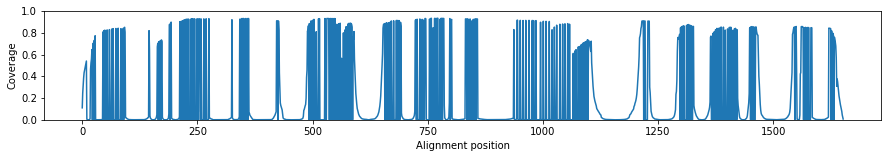

In [455]:
plt.figure(figsize=(15,2))
plt.plot(bla15_aln.calc_coverage())
plt.ylim(0,1)
plt.ylabel('Coverage')
plt.xlabel('Alignment position')

I am going to threshold this alignment to only keep positions that are at least 50% conserved. (Later I will get into other ways to do this based on alignment probability thresholds!)

Note that because I previously called bla15_aln.calc_coverage(), bla15_aln now has a .coverage attribute.

In [456]:
bla15_aln = bla15_aln[:,bla15_aln.coverage > 0.5]
print(bla15_aln)

Alignment with 5011 rows and 310 columns
GWE--PEGASLAVFVKGRKVVDLWGGYADKQAARIWKEDTVTVT...MKA A0A0N4WS98/47-410
GWE--SVGAAFAVFVKGRKVVDLWGGYADKQAARPWKEDTLMIT...LKA A0A0N4WS98/446-766
GWE--SVGAAFAVFVKGRAVVDLWGGYADKQAAQPWKEDTLMVT...LKA A0A0N4WS98/808-1154
EMARHIPGLSICVATDNEIQFERGFGLADVENGLPVTVETKFRT...QG- A0A517SIU4/36-364
---KNIPAFSISLVDGDRVVWAQGFGTARADGNVPATADSLYRV...--- A0A517SIU4/417-716
AISRGIPGLSLAIGHDNQVCYSKGFGLADVEHDVRASTDTRYRT...QNT A0A1P8WNG2/35-358
EVEKQLPAFSISLVDNDRMVWADGSGFQDAKQSRPATSDTVYRV...DGS A0A1P8WNG2/388-714
GLE--TDGAAFAVYKDGVAVVDLWGGYANVSSRKPWEKDTMAIV...MKP A0A183ILD0/40-400
------EGAAFSVYVDGKLVVDVWGGYADYSTNREWKADTMGLW...MKL A0A183ILD0/414-805
GWE--RGGAAFVVYFNGKKVVDLWGGYADKECGRLWRKDTLNVA...LKV A0A3P7VNF1/49-364
------------LYDVGQCVVDIWGGFADRESERRWREDTLQII...--- A0A3P7VNF1/367-662
RAALDAPGFTAAVLRGGDLATHAG-GFRDEGETEAMRPGDRFRL...SAE I0IH98/31-350
IVGSAVRRAAVVVVEDGRASEPLGAG--------SADGSGRFRA...--- I0IH98/379-668
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/

Much better! Now I want to check to make sure that all sequences are aligned to all of the key features of beta lactamase, so I am going to make a histogram of the sequence lengths fo this new filtered alignment. I want to do this *after* filtering the positions because I am interested in how many positions aligned to the core conserved positions, not just the total length of the sequences.

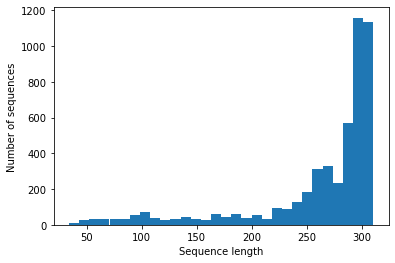

In [457]:
plt.xlabel('Sequence length')
plt.ylabel('Number of sequences')
plt.hist(bla15_aln.sequence_lengths(), bins=30); None

As you can see, the majority of sequences are aligned at at least 250 positions, but there are a decent number that were either fragments to start out with or did not align properly to the core conserved fold. I will filter out those sequences shorter than 225 aa:

In [458]:
bla15_aln = bla15_aln[bla15_aln.sequence_lengths() > 225]
print(bla15_aln)

Alignment with 4162 rows and 310 columns
GWE--PEGASLAVFVKGRKVVDLWGGYADKQAARIWKEDTVTVT...MKA A0A0N4WS98/47-410
GWE--SVGAAFAVFVKGRKVVDLWGGYADKQAARPWKEDTLMIT...LKA A0A0N4WS98/446-766
GWE--SVGAAFAVFVKGRAVVDLWGGYADKQAAQPWKEDTLMVT...LKA A0A0N4WS98/808-1154
EMARHIPGLSICVATDNEIQFERGFGLADVENGLPVTVETKFRT...QG- A0A517SIU4/36-364
---KNIPAFSISLVDGDRVVWAQGFGTARADGNVPATADSLYRV...--- A0A517SIU4/417-716
AISRGIPGLSLAIGHDNQVCYSKGFGLADVEHDVRASTDTRYRT...QNT A0A1P8WNG2/35-358
EVEKQLPAFSISLVDNDRMVWADGSGFQDAKQSRPATSDTVYRV...DGS A0A1P8WNG2/388-714
GLE--TDGAAFAVYKDGVAVVDLWGGYANVSSRKPWEKDTMAIV...MKP A0A183ILD0/40-400
------EGAAFSVYVDGKLVVDVWGGYADYSTNREWKADTMGLW...MKL A0A183ILD0/414-805
GWE--RGGAAFVVYFNGKKVVDLWGGYADKECGRLWRKDTLNVA...LKV A0A3P7VNF1/49-364
RAALDAPGFTAAVLRGGDLATHAG-GFRDEGETEAMRPGDRFRL...SAE I0IH98/31-350
IVGSAVRRAAVVVVEDGRASEPLGAG--------SADGSGRFRA...--- I0IH98/379-668
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/45-374
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/6

In [11]:
bla15_aln.calc_frequencies()

/Users/sam/Documents/GitHub/alignment-tools/__init__.py:189: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frequencies.sequence_weights = self.sequence_weights


,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0.451706,0.091302,0.004085,0.006728,0.024507,0.048534,0.059827,0.011773,0.020903,0.011052,...,0.013455,0.014656,0.004085,0.020423,0.027391,0.035560,0.014656,0.019702,0.003123,0.041326
1,0.427919,0.024507,0.001442,0.006247,0.005046,0.014656,0.011533,0.004325,0.072802,0.009611,...,0.113167,0.007689,0.010091,0.014176,0.048294,0.010572,0.009851,0.105478,0.028352,0.004325
2,0.409659,0.134310,0.000240,0.084575,0.121816,0.001201,0.021144,0.007929,0.002403,0.062710,...,0.000240,0.016098,0.001201,0.040365,0.040125,0.022826,0.023787,0.006247,0.000240,0.000961
3,0.417828,0.030034,0.002643,0.024027,0.024267,0.010572,0.134070,0.036281,0.001682,0.043248,...,0.002162,0.034118,0.009851,0.036040,0.043489,0.030995,0.043489,0.004085,0.015617,0.035560
4,0.379625,0.051658,0.000721,0.047814,0.036521,0.001201,0.133590,0.028352,0.005526,0.072561,...,0.001922,0.051177,0.006007,0.043489,0.062230,0.025469,0.015617,0.016338,0.004325,0.002883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.145843,0.024988,0.000961,0.015137,0.007208,0.001201,0.004325,0.014176,0.000240,0.006487,...,0.000000,0.576646,0.001201,0.098510,0.006728,0.048054,0.043729,0.001682,0.000240,0.000721
306,0.170111,0.062951,0.007208,0.021144,0.012254,0.011052,0.120855,0.022105,0.029313,0.037722,...,0.012975,0.034118,0.004085,0.035560,0.121576,0.105959,0.070639,0.031235,0.008169,0.016338
307,0.198462,0.050697,0.002643,0.062951,0.043969,0.040605,0.048054,0.005286,0.013936,0.018501,...,0.053820,0.059346,0.049736,0.036761,0.026670,0.059587,0.044450,0.075685,0.005286,0.014897
308,0.237866,0.038683,0.001922,0.058626,0.029793,0.012494,0.089380,0.058385,0.008650,0.043969,...,0.007208,0.058626,0.099471,0.019942,0.023066,0.071120,0.063431,0.018741,0.000961,0.042528


To get a better sense of the diversity in this alignment, I'd like to set sequence weights for each of these sequences based on  their number of neighbors. I have a function to do so based on the default sequence weighting from EVcouplings:

In [12]:
def cluster_sizes(ali, thresh):

    '''For each sequence in an alignment, calculate how many other sequences from the alignment are within 
        a given identity threshold of that sequence.'''
    
    try:
        imat = ali.identity_matrix 
    except:
        imat = CalcIdentityMatrix(ali)
    
    return np.array([np.sum(imat[i] > thresh) for i in range(ali.N)])

I'll start by calculating the percent identity matrix for each sequence and attaching this as an attribute of bla_aln. Since this will take a moment, this way it will be stored with the alignment and I won't have to calculate it again if I want to use it.

In [13]:
bla15_aln.identity_matrix = CalcIdentityMatrix(bla15_aln)

I can then set the sequence weights. The cluster_sizes() function will automatically known to use the .identity_matrix feature of bla15_aln, and bla15_aln's set_sequence_weights() function will add the weights into the alignment both as a feature of the alignment, .sequence_weights, and each one as a feature of its individual sequence record, as record.weight.

In [14]:
bla15_aln.set_sequence_weights(np.ones(bla15_aln.N) / cluster_sizes(bla15_aln, 0.8))
print('Neff:', np.sum(bla15_aln.sequence_weights))

Neff: 3809.9419681107693


In [15]:
bla15_aln.calc_frequencies()

/Users/sam/Documents/GitHub/alignment-tools/__init__.py:189: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frequencies.sequence_weights = self.sequence_weights


,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0.459345,0.095496,0.003500,0.007087,0.024147,0.050219,0.056505,0.012730,0.022310,0.010709,...,0.012599,0.016011,0.004462,0.022048,0.029003,0.011330,0.015880,0.021260,0.003412,0.043833
1,0.435111,0.026072,0.001575,0.006824,0.005512,0.015355,0.010092,0.004200,0.074874,0.010368,...,0.109852,0.007874,0.011024,0.014917,0.026553,0.011286,0.010761,0.113440,0.025044,0.004724
2,0.416738,0.110552,0.000262,0.089962,0.123733,0.001312,0.021260,0.007472,0.002625,0.065268,...,0.000262,0.016194,0.001312,0.043395,0.041995,0.022441,0.025110,0.006824,0.000262,0.001050
3,0.420653,0.032153,0.002887,0.025000,0.025591,0.011286,0.138374,0.037980,0.001837,0.046195,...,0.002362,0.035521,0.009816,0.036090,0.045320,0.028671,0.021916,0.004331,0.016404,0.037402
4,0.380495,0.049921,0.000787,0.051182,0.038496,0.001312,0.114954,0.030184,0.006037,0.071204,...,0.002100,0.052757,0.005818,0.046851,0.065224,0.026641,0.016142,0.017848,0.004724,0.003150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.149570,0.025057,0.001050,0.016536,0.007874,0.001312,0.004724,0.015223,0.000262,0.006693,...,0.000000,0.558089,0.001312,0.103807,0.007349,0.049695,0.046457,0.001837,0.000262,0.000787
306,0.175424,0.066361,0.007874,0.021523,0.013386,0.011024,0.120837,0.022835,0.027428,0.034848,...,0.012599,0.019137,0.004462,0.038321,0.131892,0.088896,0.074936,0.033859,0.008662,0.017454
307,0.204864,0.054988,0.002887,0.066799,0.045801,0.026268,0.051051,0.005774,0.014042,0.018504,...,0.056650,0.037577,0.050823,0.034154,0.027953,0.063649,0.047245,0.082416,0.005512,0.015617
308,0.244312,0.037003,0.002100,0.061768,0.032021,0.013649,0.095015,0.063256,0.009449,0.040311,...,0.007874,0.062687,0.104857,0.021523,0.021776,0.062494,0.038277,0.020210,0.001050,0.044358


In [147]:
bla15_aln.ids[np.where([id[0]=='P' for id in bla15_aln.ids])]

array(['P00811/30-376', 'P24735/38-385', 'P77619/44-412', 'P71988/60-383',
       'P72041/43-398', 'P9WLZ3/19-365', 'P0AD70/45-357', 'P95290/59-394',
       'P95291/58-363', 'P32959/11-336', 'P74200/40-364', 'P71778/45-382',
       'P95207/42-388', 'P74474/66-375', 'P71981/70-387'], dtype='<U20')

In [153]:
ecoli_ampC = readPDB("example_files/structures/6t5y.pdb", "P00811")
bla15_aln.attach_structure(ecoli_ampC, bla15_aln.get_index(ecoli_ampC.name))

In [459]:
bla15_aln.attach_structure("example_files/structures/6t5y.pdb", bla15_aln.get_index("P00811"))

In [165]:
bla15_aln[bla15_aln.get_index("P00811")].structures[0]

I'm now going to calculate the frequencies of each amino acid at each position in this alignment, and plot them as a sequence logo

In [118]:
ohe = bla15_aln.upper().replace('X','-').one_hot_encoding()
ohe_pos = np.array([i.split('_')[0] for i in ohe.columns]).astype('int')
ohe_aa = np.array([alphabet.index(i.split('_')[1]) for i in ohe.columns]).astype('int')

In [119]:
bla15_pca_model = PCA(10)
bla15_pca_embed = bla15_pca_model.fit_transform(ohe)

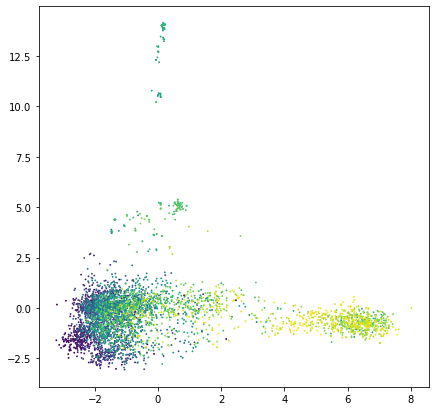

In [120]:
plt.figure(figsize=(7,7))
plt.scatter(bla15_pca_embed[:,0], bla15_pca_embed[:,1], s=0.7, c = np.arange(bla15_aln.N))

In [124]:
C1 = np.zeros((bla15_aln.L, len(alphabet)))
C1[pos,aa] = bla15_pca_model.components_[0]
C1 = pd.DataFrame(C1, columns=list(alphabet))

(array([10., 56., 75., 43., 44., 20.,  9., 12., 20., 21.]),
 array([0.00162473, 0.02596852, 0.05031232, 0.07465611, 0.09899991,
        0.1233437 , 0.1476875 , 0.17203129, 0.19637509, 0.22071888,
        0.24506268]),
 <BarContainer object of 10 artists>)

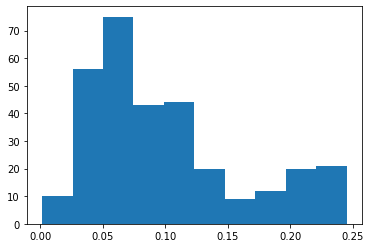

In [140]:
plt.hist(np.sum(np.sqrt(C1**2), axis=1))

In [141]:
import py3Dmol

In [450]:
s = bla15_aln.structures[1][1]

In [437]:
pos_entropy = -np.sum(bla15_aln.calc_frequencies() * np.log(bla15_aln.frequencies),axis=1)

/Users/sam/Documents/GitHub/alignment-tools/__init__.py:189: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frequencies.sequence_weights = self.sequence_weights


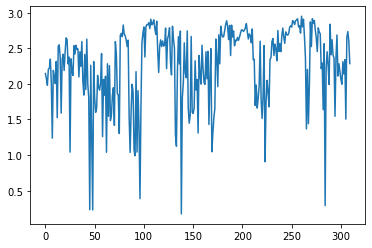

In [438]:
plt.plot(pos_entropy)

In [276]:
pos_entropy[s._alipos] > 2

0       True
1       True
2      False
3       True
4       True
       ...  
304     True
305    False
307     True
308     True
309     True
Length: 281, dtype: bool

In [235]:
s.bfactors = np.ones(len(s.bfactors))

In [238]:
s.save('temp.pdb')
pdb = ''.join([line for line in open('temp.pdb')])
os.remove('temp.pdb')

In [467]:
x = [int(i) for i in np.where(pos_entropy[s._alipos] < 1.5)[0]]

In [468]:
pos_entropy[s._alipos]

0      2.145334
1      2.072734
2      1.981482
3      2.208141
4      2.215776
         ...   
304    2.340568
305    1.505475
307    2.735527
308    2.603597
309    2.285656
Length: 281, dtype: float64

In [312]:
from matplotlib.cm import Reds
from matplotlib import colors

In [469]:
x = np.array(pos_entropy)[s._alipos]
x = (x-np.min(x))
x = x/np.max(x)
x = 1 - x

In [358]:
len(x)

281

(array([88., 54., 44., 40., 22., 16., 10.,  3.,  0.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

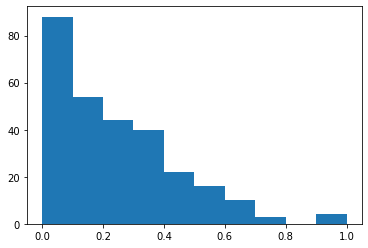

In [348]:
plt.hist(x)

In [439]:
ores = [res for res in s if not res.is_disordered()]

In [446]:
s._pdbpos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [452]:
len(s._pdbpos)

338

In [466]:
s = bla15_aln.structures[0][1]

In [471]:
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(pdb,'pdb')
xyzview.setStyle({'cartoon':{'color':'black'}})

for i in np.arange(len(s._alipos)):
    
    ordered_resn = s._pdbpos[i]
    ali_position = s._alipos[i]
    
    n = ores[ordered_resn].id[1]
    xyzview.setStyle({'resi': n}, 
                     {'cartoon':{'color': colors.to_hex(Reds(x[i]))}})
    
#xyzview.setStyle({},{'sphere':{'colorscheme':{'prop':'b'}}})
xyzview.zoomTo()
xyzview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [580]:
from matplotlib import cm
import matplotlib as mpl

In [582]:
import matplotlib as mpl
cmap = mpl.colormaps['viridis']

AttributeError: module 'matplotlib' has no attribute 'colormaps'

In [568]:
def MapToStructure(s, pos_entropy, colormap=cm.viridis, unmapped_color="white", xlabel="", width=500, height=500):
    
    x = np.array(pos_entropy)[s._alipos]
    x = (x-np.min(x))
    x = x/np.max(x)
    
    xyzview = py3Dmol.view(width=width,height=height)
    xyzview.addModel(pdb,'pdb')
    xyzview.setStyle({'cartoon':{'color':unmapped_color}})

    for i in np.arange(len(s._alipos)):

        ordered_resn = s._pdbpos[i]
        ali_position = s._alipos[i]

        n = ores[ordered_resn].id[1]
        xyzview.setStyle({'resi': n}, 
                         {'cartoon':{'color': colors.to_hex(colormap(x[i]))}})

    xyzview.zoomTo()
    xyzview.show()
    
    cm_normalizer = colors.Normalize(np.min(pos_entropy), np.max(pos_entropy))
    a = cm.ScalarMappable(cm_normalizer, colormap)
    fig,ax=plt.subplots(figsize=(width / 60, 0.5))
    plt.colorbar(a, orientation="horizontal", fraction=0.5)
    if len(xlabel) > 0:
        plt.xlabel(xlabel, labelpad=40)
    ax.set_xticks([]); ax.set_xticklabels([])
    ax.set_yticks([]); ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    None

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

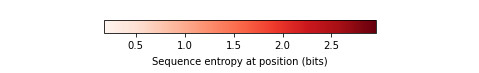

In [571]:
MapToStructure(s, pos_entropy, Reds, height=300, xlabel="Sequence entropy at position (bits)")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

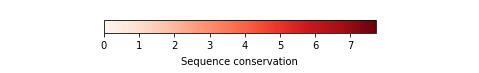

In [577]:
MapToStructure(s, (np.max(pos_entropy) - pos_entropy)**2, Reds, height=300, xlabel="Sequence conservation")

In [405]:
llen=100

for i in range(int(np.ceil(A.L/llen))):
    for rec in A:
        print(rec.seq[i*llen:(i+1)*llen])
    print("")

--------------LIEQ-KIPGMAVAVIYQGKPYYFTWxGYADIAKKQPVTQQTLFELGSVSKTFTGVLGGDAIARGEIKLSDPTTKYWPELTAKQWNG
APQQINIVHRTITPLIEQQKIPG-AVAVIYQGKPYYFTW-GYADIA-KQPVTQQTLFELG-VSKTFTGVLGGDAIARGEIKLSDPTTKYWPE-TAKQWNG

ITLLHLATYTAGGLPLQVPDEVKSSSxxxxxxxDLLRFYQNWQPAWAPGTQRLYANSSIGLFGALAVKPSGLSFEQAMQTRVFQPLKLNHTWINVPPAEE
ITLLHLATYTAGGLPLQVPDEVKSSS-------DLLRFYQNWQPAWAPGTQRLYANSSIGLFGALAVKPSGLSFEQAM--RVFQPLKLNHTWINVPPAEE

KNYAWGYxREGKAVHVSPGALDAEAYxxxxxGVKSTIEDMARWVxQSNLKPLDINEKTLQQGIQLAQSRYWQTGDMYQGL---MLDWPVNPD----S---
KNYAWGY-REGKAVHVSPGALDAEAY-----GVKSTIEDMARWV-QSNL-PLD-NEKTLQQGIQLAQSRYWQTGD-YQGLGWEMLDWPVNPDIINGSDNK

I--------I--------ASWVHK---TGGFGSYVAFIPEKELGIVMLANKNYP-------------
IALAAPVKAITPPTPAVRASWVHKTGATGGFG-Y-AFIPEK--GIVMLAN-NYPNPARVAAQILNAL



In [413]:
A1 = A[:,np.where(A.matrix[0]!='-')[0]]
A2 = A[:,np.where(A.matrix[1]!='-')[0]]

In [415]:
np.where(A1.matrix[1]!='-')[0] # Positions in the alignment that match positions in the structure

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 19

In [416]:
np.where(A2.matrix[1]!='-')[0] # residues in the structure coveraged by the alignment

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [410]:
np.sum(A.calc_coverage()==1)

281

In [388]:
A[1]

SeqRecord(seq=Seq('APQQINIVHRTITPLIEQQKIPG-AVAVIYQGKPYYFTW-GYADIA-KQPVTQQ...NAL'), id=None, name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [199]:
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(pdb,'xyz')
xyzview.setStyle({'cartoon':{'color':'spectrum'}})
xyzview

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [129]:
def logo_from_df(counts_mat, color_scheme='chemistry', vpad=.025, width=.9, figsize=(15,2),font='Arial',
                    spacing=1, anchor=25, rotation=90, fmt='%d', fontsize=12):

    prob_mat = lm.transform_matrix(counts_mat, from_type='counts', to_type='probability', pseudocount=0.01)
    info_mat = lm.transform_matrix(prob_mat, from_type='probability', to_type='information')

    lm_logo=lm.Logo(info_mat, figsize=figsize, color_scheme=color_scheme, vpad=vpad, width=width, font_name=font)

    # style using Axes methods
    lm_logo.ax.set_ylabel('information (bits)')

    lm_logo.style_xticks(spacing=spacing, anchor=anchor, rotation=rotation, fmt=fmt, fontsize=fontsize)

    return lm_logo

In [109]:
X.shape

(310, 21)

array([[ 9.41990303e-02, -1.92071330e-02, -1.31920126e-04, ...,
        -3.66284485e-03, -6.30961190e-04, -8.32882867e-03],
       [ 9.66398130e-02, -4.32878645e-03, -2.89704650e-04, ...,
        -2.32381194e-02, -4.89538553e-03, -7.06367442e-04],
       [ 9.72856036e-02, -1.70134820e-02, -5.43358761e-05, ...,
        -1.32371228e-03, -5.45943633e-05, -1.71222620e-04],
       ...,
       [ 5.90035497e-02, -3.55862898e-03, -5.97212775e-04, ...,
        -1.38885659e-02, -4.82550026e-04, -1.88048913e-04],
       [ 6.00594457e-02, -1.58593413e-03, -3.66221099e-04, ...,
         2.03740802e-04, -2.12790485e-04, -4.07580953e-03],
       [ 5.58039075e-02, -1.73505555e-03, -1.02736588e-04, ...,
        -1.59809335e-03, -1.26672677e-03, -5.86694606e-04]])

In [ ]:
sequence_logo(bla15_aln, np.arange(bla15_aln.L), figsize=(90,1.5))

In [24]:
import logomaker as lm

In [27]:
aln = bla15_aln
s = np.arange(bla15_aln.L)

In [28]:
counts_mat = lm.alignment_to_matrix([''.join(np.array(aln[k])[s]).upper() for k in range(len(aln))], to_type='counts')

In [29]:
counts_mat

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
pos,,,,,,,,,,,,,,,,,,,,,
0,380.0,17.0,28.0,102.0,202.0,249.0,49.0,87.0,46.0,313.0,...,61.0,17.0,85.0,114.0,148.0,61.0,82.0,13.0,0.0,172.0
1,102.0,6.0,26.0,21.0,61.0,48.0,18.0,303.0,40.0,291.0,...,32.0,42.0,59.0,201.0,44.0,41.0,439.0,118.0,0.0,18.0
2,559.0,1.0,352.0,507.0,5.0,88.0,33.0,10.0,261.0,8.0,...,67.0,5.0,168.0,167.0,95.0,99.0,26.0,1.0,0.0,4.0
3,125.0,11.0,100.0,101.0,44.0,558.0,151.0,7.0,180.0,83.0,...,142.0,41.0,150.0,181.0,129.0,181.0,17.0,65.0,0.0,148.0
4,215.0,3.0,199.0,152.0,5.0,556.0,118.0,23.0,302.0,54.0,...,213.0,25.0,181.0,259.0,106.0,65.0,68.0,18.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,104.0,4.0,63.0,30.0,5.0,18.0,59.0,1.0,27.0,8.0,...,2400.0,5.0,410.0,28.0,200.0,182.0,7.0,1.0,0.0,3.0
306,262.0,30.0,88.0,51.0,46.0,503.0,92.0,122.0,157.0,269.0,...,142.0,17.0,148.0,506.0,441.0,294.0,130.0,34.0,0.0,68.0
307,211.0,11.0,262.0,183.0,169.0,200.0,22.0,58.0,77.0,369.0,...,247.0,207.0,153.0,111.0,248.0,185.0,315.0,22.0,0.0,62.0


In [35]:
f = pd.DataFrame(bla15_aln.frequencies, columns=list(alphabet))

In [43]:
f.index = np.arange(1,311)

In [44]:
f.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            301, 302, 303, 304, 305, 306, 307, 308, 309, 310],
           dtype='int64', length=310)

In [10]:
M_upper = bla15_aln.upper().replace('.','-')

In [11]:
np.sum(M_upper.matrix[:,4]=="A")

215

In [12]:
M_upper.matrix[:,4]

array(['-', '-', '-', ..., 'L', '-', '-'], dtype='<U1')

In [13]:
np.average(M_upper.matrix[:,4]=="A", weights=bla15_aln.sequence_weights)

0.04992108283101777

In [14]:
f = np.array([[np.average(M_upper.matrix[:,k]==i, weights=bla15_aln.sequence_weights) for i in alphabet] for k in range(M_upper.matrix.shape[1])])

In [15]:
f.shape

(310, 21)